# Pymaceuticals Inc.
---

### Analysis

	There are two distinct conclusions to be made from an initial analysis of the visualized data. Firstly, in the last section we can observe a clear linear correlation between the average tumor volume and the weight of the mouse. Heavier mice have a higher likelihood of developing a larger tumor mass. This result was concluded solely from analyzing the mice who received Capomulin treatment. To receive a conclusive answer the correlation would need to be tested with the mice who received the other treatments as well. 
	Secondly, from the observed line plot, a conclusion can be made about the effectiveness of the Capomulin treatment. Overall, the line plot demonstrates a downward trend with tumor volume gradually declining over the recorded 45 days. This would suggest that Capomulin could be an efficient deterrent against tumor growths. This plot would need to be visualized for the other treatments to be able to analyze their effectiveness and ultimately reach a conclusion on which treatment is the most effective.

 

In [127]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer", sort=False)
#Not sure why the results sort alphabetically

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [3]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].nunique()
num_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_rows = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mice = duplicate_rows['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
g989 = merged_data[merged_data['Mouse ID'] == 'g989']
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [111]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data[merged_data['Mouse ID'] != 'g989']
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_data['Mouse ID'].nunique()
num_mice

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std Dev.', 'Tumor Volume Std Err.']

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Group the data by 'Drug Regimen' and calculate summary statistics
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Display the summary statistics table
summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

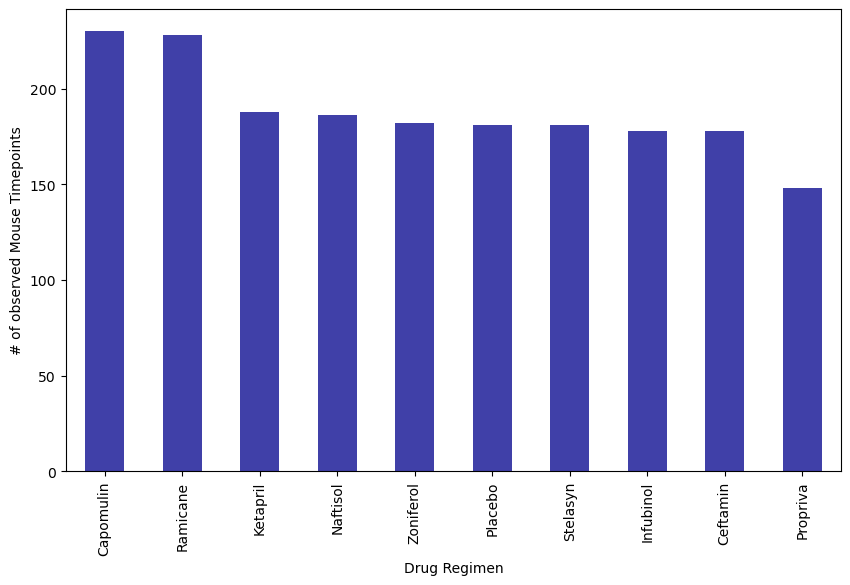

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_data['Drug Regimen'].value_counts()

drug_counts.plot(kind='bar', color='darkblue', alpha=0.75, figsize=(10, 6))
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

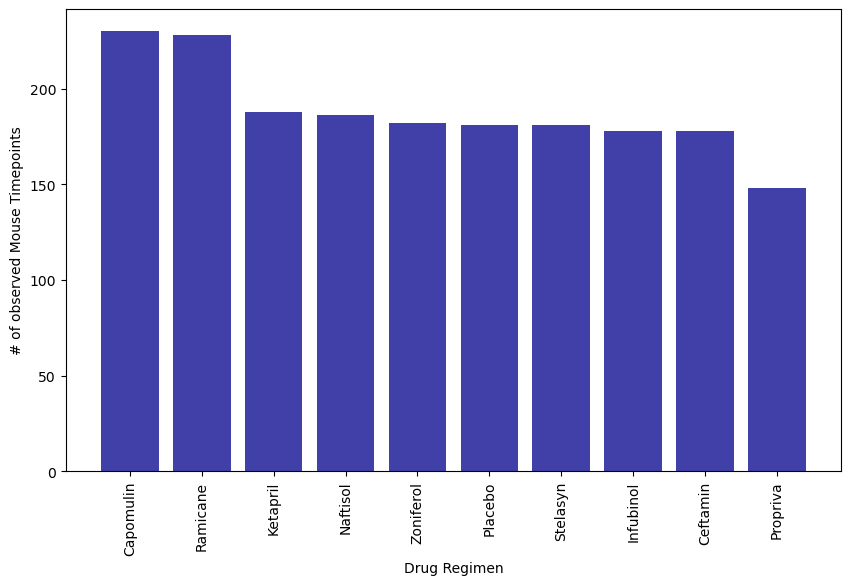

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_data['Drug Regimen'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(drug_counts.index, drug_counts.values, color='darkblue', alpha = 0.75)
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

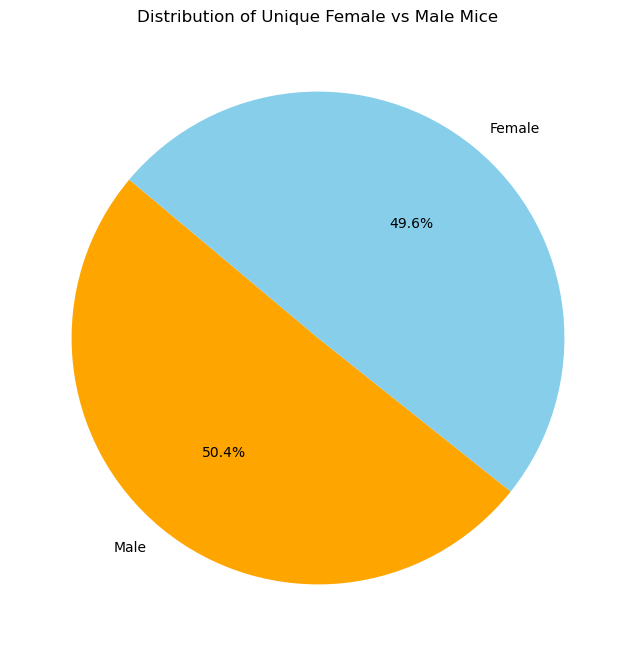

In [25]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = clean_data.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]
gender_counts = unique_mice_gender['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'skyblue'], startangle=140, figsize=(8, 8))
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('')
plt.show()

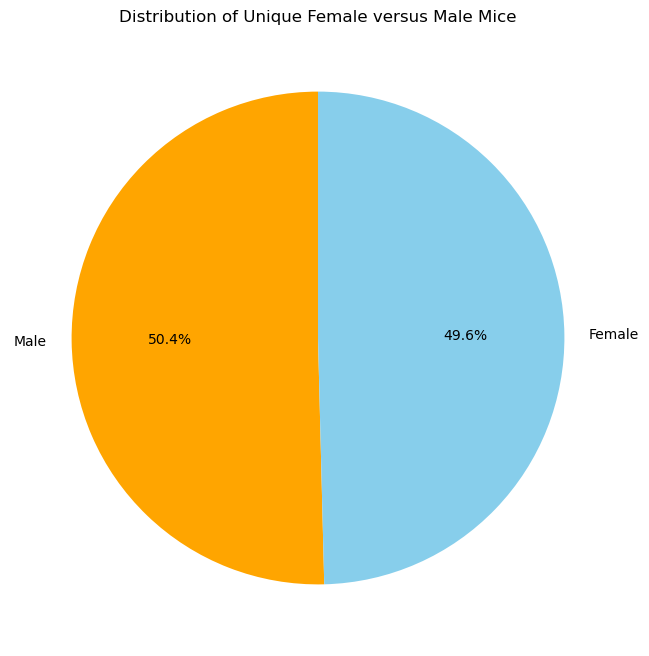

In [27]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = clean_data.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]
gender_counts = unique_mice_gender['Sex'].value_counts()
total_mice = gender_counts.sum()
female_percentage = (gender_counts['Female'] / total_mice) * 100
male_percentage = (gender_counts['Male'] / total_mice) * 100

unique_mice_gender = {
    'Male': male_percentage,
    'Female': female_percentage}

# Make the pie chart
plt.figure(figsize=(8, 8))
plt.pie(unique_mice_gender.values(), labels=unique_mice_gender.keys(), autopct='%1.1f%%', startangle=90, colors=['orange','skyblue'])
plt.title('Distribution of Unique Female versus Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [101]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
specified_data = clean_data[clean_data['Drug Regimen'].isin(specified_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = specified_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint.columns = ['Mouse ID', 'Last Timepoint']
last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_data = pd.merge(last_timepoint, specified_data, on=['Mouse ID'], how='inner')
final_tumor_volume_data = final_tumor_volume_data[final_tumor_volume_data['Timepoint'] == final_tumor_volume_data['Last Timepoint']]
final_tumor_volume_data.head()


,Mouse ID,Last Timepoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,45,65.525743,1,Infubinol,Female,21,25
29,a275,45,45,62.999356,3,Ceftamin,Female,20,28
39,a411,45,45,38.407618,1,Ramicane,Male,3,22
49,a444,45,45,43.047543,0,Ramicane,Female,10,25


In [97]:
# Put treatments into a list for for loop (and later for plot labels)
specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in specified_regimens:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume_data.loc[final_tumor_volume_data['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']

    # add subset
    tumor_volume_data.append(tumor_volumes)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"Potential outliers for {regimen}: {outliers}")


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 132    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Tumor Volume (mm3)')

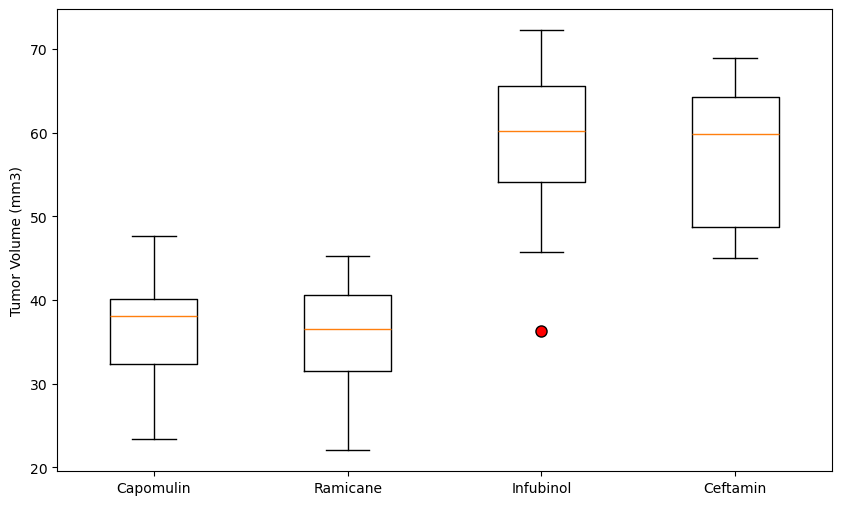

In [99]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=specified_regimens, flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

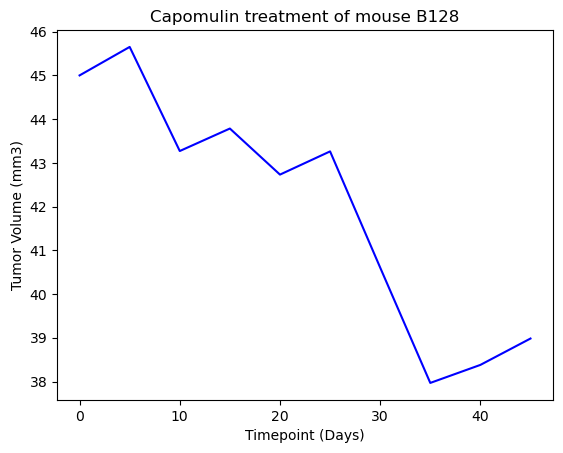

In [119]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = clean_data[(clean_data['Mouse ID'] == 'b128') & (clean_data['Drug Regimen'] == 'Capomulin')]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='b')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse B128')
plt.show()

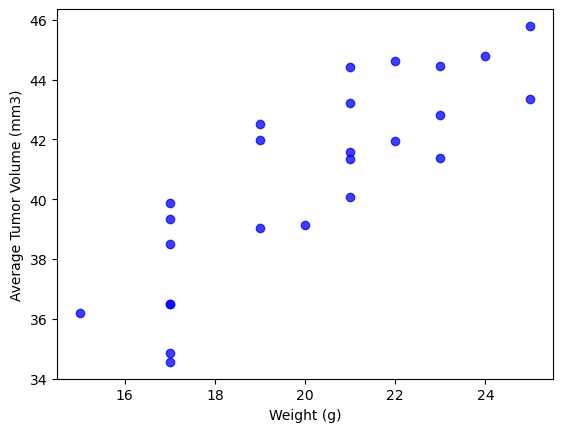

In [125]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

merged_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', alpha=0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

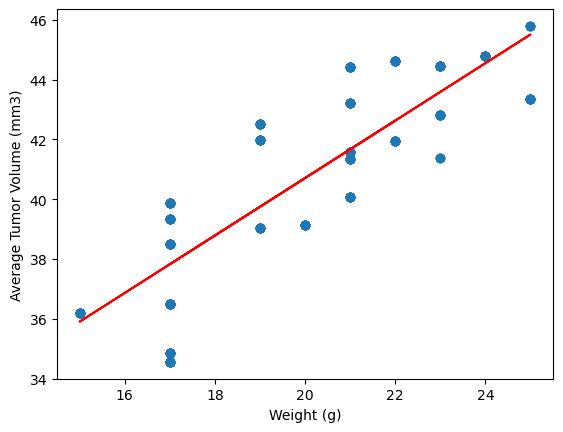

The correlation between mouse weight and the average tumor volume is 0.8343958614425966


In [141]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

capomulin_merged_data = pd.merge(capomulin_data, average_tumor_volume, on='Mouse ID')

X = capomulin_merged_data['Weight (g)']
Y = capomulin_merged_data['Tumor Volume (mm3)_y'] 

correlation = X.corr(Y)

(slope, intercept, rvalue, pvalue, stderr) = linregress(X, Y)
regress = X * slope + intercept

plt.scatter(X, Y)
plt.plot(X, regress, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

